In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from GIANTS_kano_analysis import (get_feature_names, prepare_kano_data, apply_kano_scoring, apply_kano_scoring_explicit, calculate_kano_averages,plot_kano_results, plot_kano_results_new,plot_kano_with_leader_lines)

# Load your dataset
df = pd.read_excel("C:/Users/TomiNordi2m/OneDrive - i2m Unternehmensentwicklung GmbH/Documents/Backup Python/2024.10.21 GIANTS project_ User and stakeholder needs survey (Responses).xlsx")

In [2]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 323


In [3]:

# Define the age categories for retirees
retiree_ages = ['60-78', '>78']

# Filter the dataframe for respondents within the retiree 2. Age
df_retiree = df[df['2. Age'].isin(retiree_ages)]

# Define keywords related to work for primary and secondary use filtering
work_related_keywords = ['work', 'commuting']

# Function to check if any of the work-related keywords are present
def not_work_related(usage):
    if pd.isnull(usage):
        return True  # Keep null values (assuming these could be retirees too)
    usage = str(usage)  # Convert to string to avoid errors with numeric entries
    return not any(keyword in usage.lower() for keyword in work_related_keywords)

# Apply the filtering on both primary and secondary usage
df_retiree = df_retiree[df_retiree['16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]
df_retiree = df_retiree[df_retiree['21. How do you generally use your secondary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]

# Get the count of how many people fulfill the retiree criteria
retiree_count = len(df_retiree)

# Output the count
print(f"Number of respondents who fulfill the retiree criteria: {retiree_count}")


Number of respondents who fulfill the retiree criteria: 30


In [4]:
# Define the 2. Age for students
student_ages = ['18-29']  # Adjust based on the dataset categories

# Define the low-income ranges based on the income column
low_income_ranges = [
    '0 - 2,500€', 
    '2,500 - 5,000€', 
    '5,000 - 10,000€', 
    '10,000 - 25,000€'
]

# Filter the dataframe for respondents within the student 2. Age
df_student = df[df['2. Age'].isin(student_ages)]

# Further filter for respondents within the low-income ranges
df_student = df_student[df_student['9.  Estimated annual household (family) income in 2023 in Euros (€/EUR)? (Link to EU Currency Converter)'].isin(low_income_ranges)]

# Get the count of how many people fulfill the student criteria
student_count = len(df_student)

# Output the count
print(f"Number of respondents who fulfill the student criteria: {student_count}")

# The resulting filtered dataframe `df_student` will now contain only students




Number of respondents who fulfill the student criteria: 22


In [5]:
# Combine the two columns to calculate total household size
df['Total Household Size'] = (
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce').fillna(0) +
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce').fillna(0)
)

# Filter for families with total household size >= 2
df_family = df[df['Total Household Size'] >= 2]

# Further filter for households with at least one child
df_family = df_family[
    df_family['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'] > 0
]

# Output the count of families with kids
family_with_kids_count = len(df_family)
print(f"Number of families with kids: {family_with_kids_count}")


Number of families with kids: 93


In [6]:
# Calculate total household size
df['Total Household Size'] = (
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce').fillna(0) +
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce').fillna(0)
)

# Define the age ranges to include
single_person_ages = ['30-44', '45-65']

# Filter for small households (1 or 2 people total)
df_single_person = df[df['Total Household Size'] <= 2]

# Further filter for respondents within the specified age range
df_single_person = df_single_person[df_single_person['2. Age'].isin(single_person_ages)]

# Further filter for households with no children (or missing child data)
df_single_person = df_single_person[
    (df_single_person['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'] == 0) |
    (df_single_person['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'].isna())
]

# Output the count of single-person households in the given age range without kids
single_person_age_filtered_count = len(df_single_person)
print(f"Number of single/couple without kids: {single_person_age_filtered_count}")


Number of single/couple without kids: 63


In [7]:
# Filter respondents whose trip purpose involves work-related usage
df_service_providers = df[
    df['16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'].isin([
        'Vehicle is my work tool (for passenger transport)',
        'Vehicle is my work tool (for cargo/delivery)'
    ])
]

# Count the number of service providers identified
service_provider_count = len(df_service_providers)
print(f"Number of service providers identified: {service_provider_count}")


Number of service providers identified: 6


In [8]:
df.name = "All Survey Respondents"
df_student.name = "Student Persona"
df_family.name = "Family w/ kids Persona"
df_retiree.name = "Retiree Persona"
df_single_person.name = "Adult/Couple w/o kids Persona"

# Choose Persona Subgroup below

In [9]:
df=df_family

In [10]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 93


### Max Speed

### Gross Weight Vehicle excl. Battery, excl. Passenger [kg]

### Trip total range without charging/swapping

### Expected added capacity/range per battery pack (expectation on range extension)


### Applicable drive cycle (e. g. WMTC, or IDC).


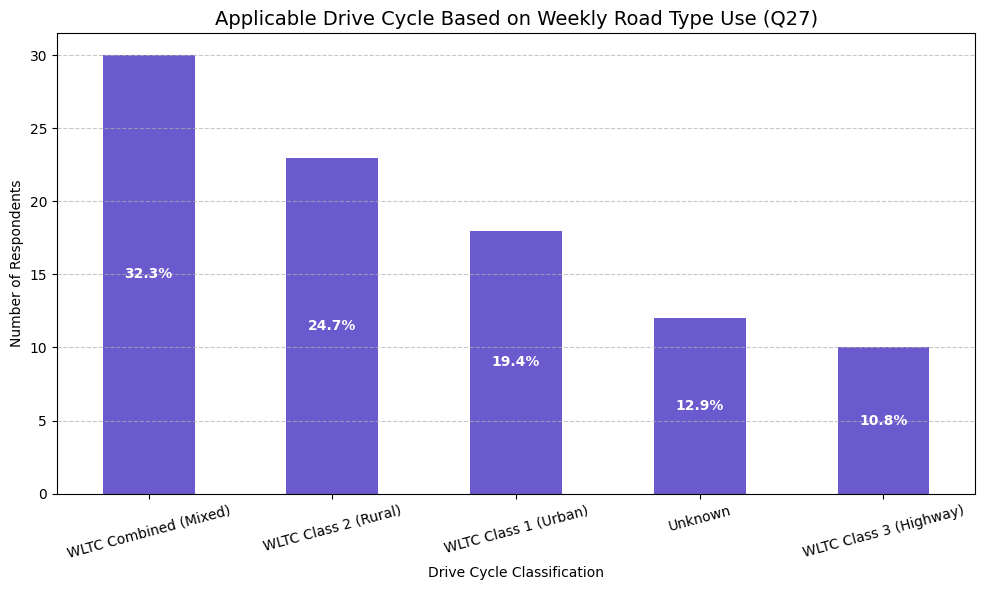

In [11]:


# Define the relevant Q27 columns
q27_urban_col = "27. How many hours do you generally spend per week on the following in your own vehicles / on public transport? (Road types are only an example. Please choose what best aligns with the infrastructure/speed limit.) [Local (sub)urban roads (restricted speeds / residential areas) (20 – 30 km/h)]"
q27_rural_1 = "27. How many hours do you generally spend per week on the following in your own vehicles / on public transport? (Road types are only an example. Please choose what best aligns with the infrastructure/speed limit.) [Rural roads / motorways (45 – 70 km/h)]"
q27_rural_2 = "27. How many hours do you generally spend per week on the following in your own vehicles / on public transport? (Road types are only an example. Please choose what best aligns with the infrastructure/speed limit.) [Rural roads / motorways (70 – 90 km/h)]"
q27_highway_col = "27. How many hours do you generally spend per week on the following in your own vehicles / on public transport? (Road types are only an example. Please choose what best aligns with the infrastructure/speed limit.) [Highway\t (>90 km/h)]"

# Convert to numeric and fill NA with 0
for col in [q27_urban_col, q27_rural_1, q27_rural_2, q27_highway_col]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Combine rural segments
df['Q27_Rural_Total'] = df[q27_rural_1] + df[q27_rural_2]

# Function to assign applicable drive cycle
def classify_drive_cycle(row):
    urban = row[q27_urban_col]
    rural = row['Q27_Rural_Total']
    highway = row[q27_highway_col]
    total = urban + rural + highway

    if total == 0:
        return 'Unknown'

    urban_pct = urban / total
    rural_pct = rural / total
    highway_pct = highway / total

    if urban_pct >= 0.6:
        return 'WLTC Class 1 (Urban)'
    elif highway_pct >= 0.6:
        return 'WLTC Class 3 (Highway)'
    elif rural_pct >= 0.6:
        return 'WLTC Class 2 (Rural)'
    else:
        return 'WLTC Combined (Mixed)'

# Apply the function
df['Applicable Drive Cycle'] = df.apply(classify_drive_cycle, axis=1)

# Count and calculate percentages
cycle_counts = df['Applicable Drive Cycle'].value_counts().sort_values(ascending=False)
cycle_percentages = (cycle_counts / cycle_counts.sum() * 100).round(1)

# Plotting
plt.figure(figsize=(10, 6))
ax = cycle_counts.plot(kind='bar', color='slateblue')
plt.title('Applicable Drive Cycle Based on Weekly Road Type Use (Q27)', fontsize=14)
plt.ylabel('Number of Respondents')
plt.xlabel('Drive Cycle Classification')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels inside bars
for i, (count, pct) in enumerate(zip(cycle_counts, cycle_percentages)):
    ax.text(i, count / 2, f'{pct}%', ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.show()


### Min. environment temperature [°C]


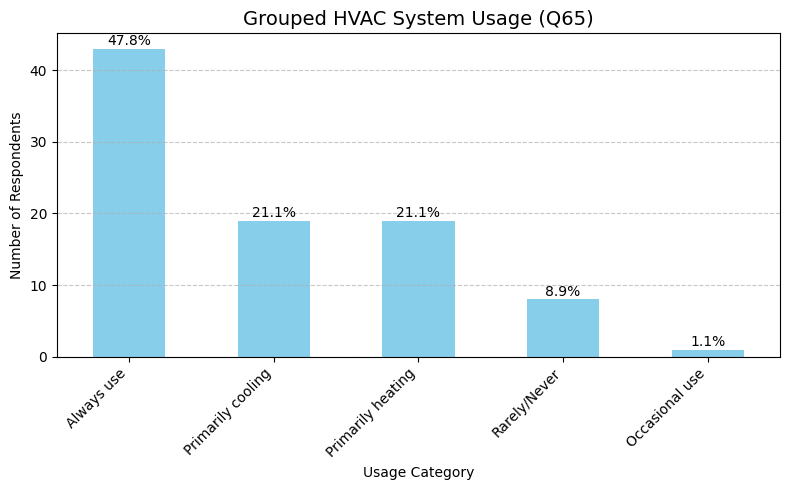

In [12]:
# Extract the column for Q65
q65_col = '65. How often do you use the HVAC system (Heating, Ventilation, and Air Conditioning) in your car, and for what purposes? Please select the option that best describes your usage.'

# Value counts for plotting
q65_counts = df[q65_col].value_counts().sort_values(ascending=False)


# Define grouped categories for all responses
grouped_labels = {
    'I use the HVAC system for both heating and cooling throughout the year.': 'Always use',
    'I use the HVAC system primarily for cooling during hot weather.': 'Primarily cooling',
    'I rarely or never use the HVAC system.': 'Rarely/Never',
    'I use the HVAC system primarily for heating during cold weather.': 'Primarily heating',
    'We live in the desert so AC is required from April through October!': 'Primarily cooling',
    'I currently do not have a car': 'No vehicle',
    "I don't own any vehicles. In a Cambio, I use both heating/cooling, depending on the weather.": 'No vehicle',
    'I use the HVAC system on very cold/hot conditions. Not very often, but necessary on peak situations.': 'Occasional use',
    "For demisting the window's": 'Occasional use',
    'I use the HVAC system for cooling throughout the year (hot weather throughout the year in my country).': 'Primarily cooling',
    'Always on': 'Always use'
}

# Map the values
grouped_q65_series = df[q65_col].map(grouped_labels)

# Count values for the grouped labels
grouped_counts = grouped_q65_series.value_counts().sort_values(ascending=False)

# Calculate percentages
total = grouped_counts.sum()
percentages = (grouped_counts / total * 100).round(1)

# Plotting
plt.figure(figsize=(8, 5))
ax = grouped_counts.plot(kind='bar', color='skyblue')
plt.title('Grouped HVAC System Usage (Q65)', fontsize=14)
plt.ylabel('Number of Respondents')
plt.xlabel('Usage Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(grouped_counts, percentages)):
    ax.text(i, count + 0.5, f'{pct}%', ha='center', fontsize=10)

plt.show()



### Max. environment temperature [°C]


### Max. climping slop [%]


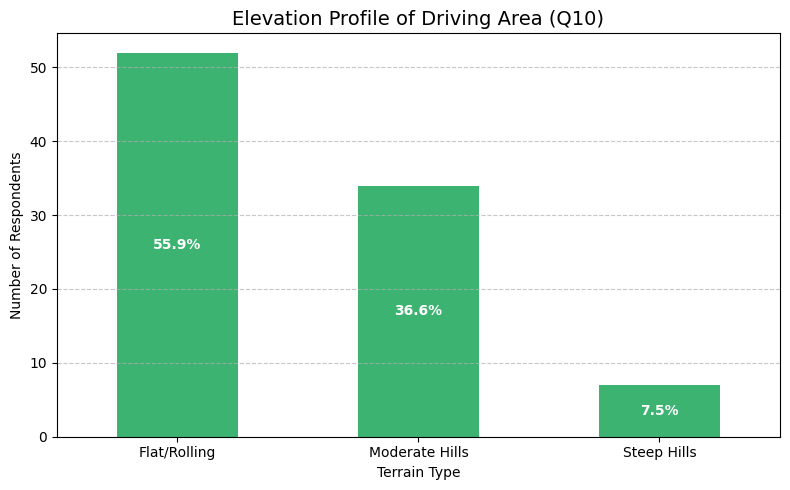

In [13]:
# Identify the exact column name for Q10
q10_col = [col for col in df.columns if "elevation profile" in col.lower()][0]

# Value counts and percentages
q10_counts = df[q10_col].value_counts().sort_values(ascending=False)
total_q10 = q10_counts.sum()
q10_percentages = (q10_counts / total_q10 * 100).round(1)

# Shortened labels mapping
short_labels = {
    'Mostly flat or gently rolling terrain': 'Flat/Rolling',
    'Moderate hills and inclines': 'Moderate Hills',
    'Steep hills and significant elevation changes': 'Steep Hills'
}

# Replace long labels with short ones
q10_counts.index = q10_counts.index.map(short_labels)
q10_percentages.index = q10_counts.index  # align indexes

# Plotting with percentages inside the bars
plt.figure(figsize=(8, 5))
ax = q10_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Elevation Profile of Driving Area (Q10)', fontsize=14)
plt.ylabel('Number of Respondents')
plt.xlabel('Terrain Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels inside bars
for i, (count, pct) in enumerate(zip(q10_counts, q10_percentages)):
    ax.text(i, count / 2, f'{pct}%', ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.show()


### Number of passengers


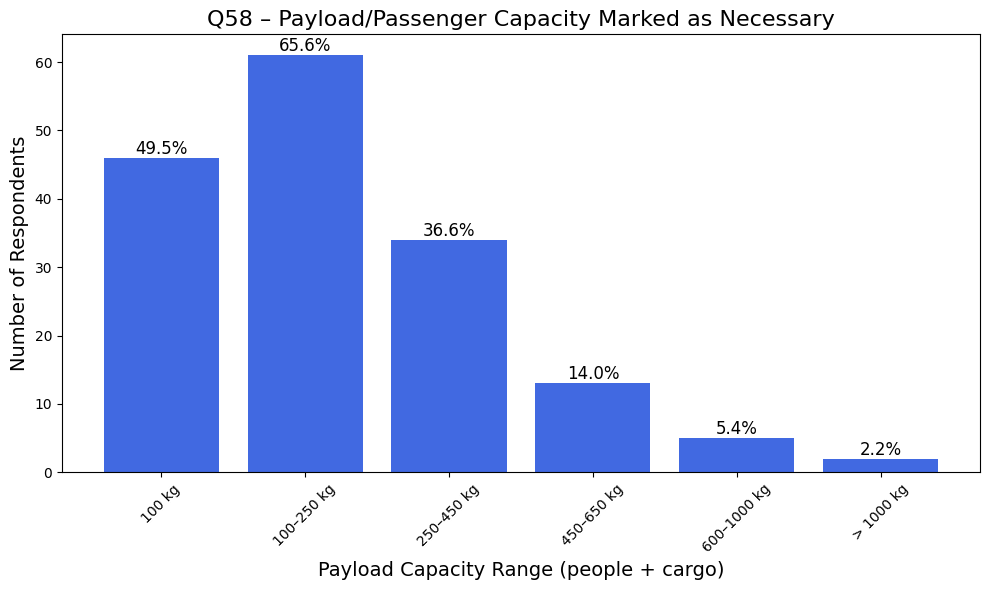

In [14]:
# Define the exact column names for the capacity options
q58_necessary_columns = {
    '100 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [100 kg capacity (people + cargo)]',
    '100–250 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 100 and 250 kg capacity (people + cargo)]',
    '250–450 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 250 and 450 kg capacity (people + cargo)]',
    '450–650 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 450 and 650 kg capacity (people + cargo)]',
    '600–1000 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 600 and 1000 kg capacity (people + cargo)]',
    '> 1000 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [> 1000 kg capacity (people + cargo)]'
}

# Count only 'Necessary' responses per category
necessary_counts = {
    label: df[col].str.strip().eq("Necessary").sum()
    for label, col in q58_necessary_columns.items()
}

# Count total number of respondents (excluding fully missing rows)
total_responses = len(df)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(necessary_counts.keys(), necessary_counts.values(), color='royalblue')

# Annotate each bar with percentage
for bar, label in zip(bars, necessary_counts.keys()):
    count = necessary_counts[label]
    percent = (count / total_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0, f'{percent:.1f}%', 
             ha='center', va='bottom', fontsize=12)
    
# Final plot setup
plt.title('Q58 – Payload/Passenger Capacity Marked as Necessary', fontsize=16)
plt.xlabel('Payload Capacity Range (people + cargo)', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






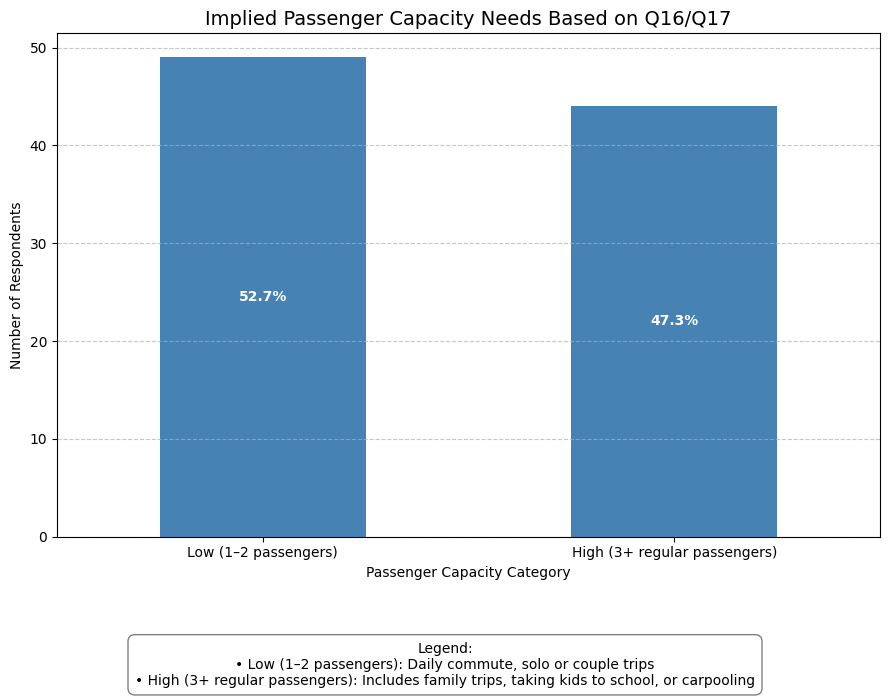

In [15]:


# Identify Q16 and Q17 columns
q16_col = [col for col in df.columns if "how do you generally use your primary" in col.lower()][0]
q17_col = [col for col in df.columns if "how do you generally use your secondary" in col.lower()][0]

# Define keywords indicating higher passenger needs
high_passenger_keywords = [
    'kids', 'family', 'ride-sharing', 'carpool', 'passenger transport'
]

# Define function to check for high passenger needs
def has_high_passenger_need(response):
    if pd.isna(response):
        return False
    response_lower = response.lower()
    return any(keyword in response_lower for keyword in high_passenger_keywords)

# Apply function to both Q16 and Q17 columns
df['High Passenger Need'] = df[q16_col].apply(has_high_passenger_need) | df[q17_col].apply(has_high_passenger_need)

# Categorize for clarity
df['Passenger Need Category'] = df['High Passenger Need'].map({
    True: 'High (3+ regular passengers)', 
    False: 'Low (1–2 passengers)'
})

# Calculate counts and percentages
passenger_need_counts = df['Passenger Need Category'].value_counts().sort_values(ascending=False)
passenger_need_percentages = (passenger_need_counts / passenger_need_counts.sum() * 100).round(1)

# Plotting
plt.figure(figsize=(9, 6))
ax = passenger_need_counts.plot(kind='bar', color='steelblue')
plt.title('Implied Passenger Capacity Needs Based on Q16/Q17', fontsize=14)
plt.ylabel('Number of Respondents')
plt.xlabel('Passenger Capacity Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels inside bars
for i, (count, pct) in enumerate(zip(passenger_need_counts, passenger_need_percentages)):
    ax.text(i, count / 2, f'{pct}%', ha='center', va='center', fontsize=10, color='white', weight='bold')

# Custom legend as text outside the plot
legend_text = (
    "Legend:\n"
    "• Low (1–2 passengers): Daily commute, solo or couple trips\n"
    "• High (3+ regular passengers): Includes family trips, taking kids to school, or carpooling"
)
plt.gcf().text(
    0.5, -0.15, legend_text,
    fontsize=10,
    ha='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)


plt.show()


### Length [mm] / Width [mm] / Height [mm]


### Payload Volume [L]


### Payload Mass [kg]



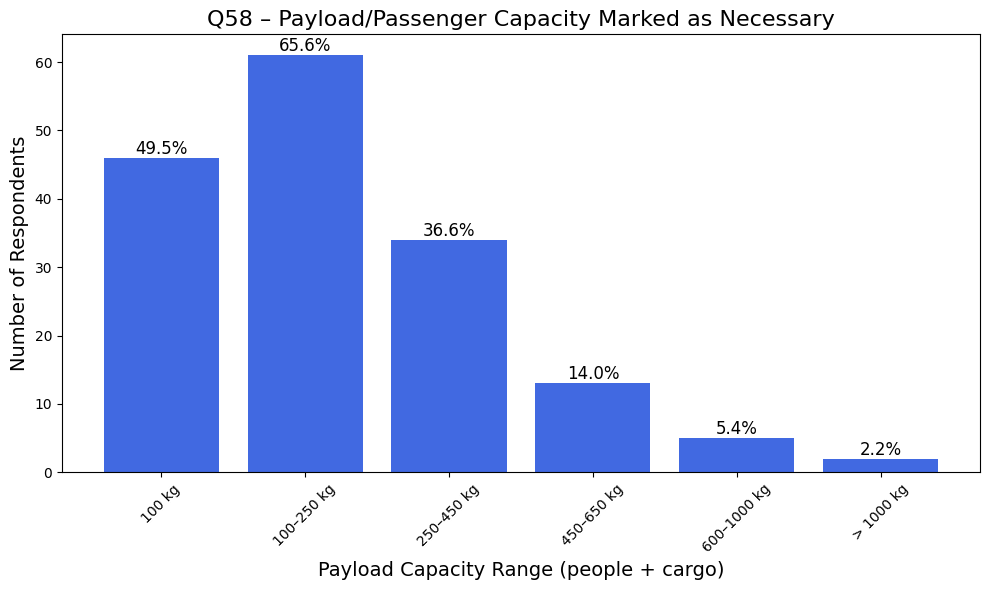

In [16]:
# Define the exact column names for the capacity options
q58_necessary_columns = {
    '100 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [100 kg capacity (people + cargo)]',
    '100–250 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 100 and 250 kg capacity (people + cargo)]',
    '250–450 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 250 and 450 kg capacity (people + cargo)]',
    '450–650 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 450 and 650 kg capacity (people + cargo)]',
    '600–1000 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [Between 600 and 1000 kg capacity (people + cargo)]',
    '> 1000 kg': '58. How much payload/passenger capacity meets your minimum needs? How much payload capacity is enough to fulfil the purpose of your travel?  [> 1000 kg capacity (people + cargo)]'
}

# Count only 'Necessary' responses per category
necessary_counts = {
    label: df[col].str.strip().eq("Necessary").sum()
    for label, col in q58_necessary_columns.items()
}

# Count total number of respondents (excluding fully missing rows)
total_responses = len(df)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(necessary_counts.keys(), necessary_counts.values(), color='royalblue')

# Annotate each bar with percentage
for bar, label in zip(bars, necessary_counts.keys()):
    count = necessary_counts[label]
    percent = (count / total_responses) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0, f'{percent:.1f}%', 
             ha='center', va='bottom', fontsize=12)
    
# Final plot setup
plt.title('Q58 – Payload/Passenger Capacity Marked as Necessary', fontsize=16)
plt.xlabel('Payload Capacity Range (people + cargo)', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weight of single module [kg]


### Placement and Ergonomics of Swapable Battery Change (consider safety in general of persons and vehicle components)


### How likely to swap? By whom? Describe environment? Time pressure? etc.


### Need for on-board charger?


### Charging time on-board


### Comfort

### Safety

In [17]:
# Full feature list
all_features = get_feature_names()

# Choose only the features you want
selected_features = [f for f in all_features if f in ["Passenger Capacity", "Comfort Features - Space", "Air Conditioning", "General Swappable Batteries",
        "Self-Swappable Batteries", "Power Capacity","Heating System","Small Vehicle Cargo Capacity", "Large Vehicle Cargo Capacity", "ABS", "Crash Safety Features", "Compact Size", "Rapid Charging", "Headrests and Mirrors"
    ]]

# Prepare and score the Kano data
df_kano = prepare_kano_data(df)
df_kano_filtered = apply_kano_scoring(df_kano, selected_features)

# Calculate averages for selected features
df_averages = calculate_kano_averages(df_kano_filtered, selected_features)

# Plot results
fig = plot_kano_results(df_averages, plot_title="Kano Analysis: Selected Features")
fig.show()

selected_features = ["Passenger Capacity", "Comfort Features - Space", "Air Conditioning", "General Swappable Batteries",
        "Self-Swappable Batteries", "Power Capacity","Heating System","Small Vehicle Cargo Capacity", "Large Vehicle Cargo Capacity", "ABS", "Crash Safety Features", "Compact Size", "Rapid Charging", "Headrests and Mirrors"
    ]
df_kano = prepare_kano_data(df)
df_kano = apply_kano_scoring(df_kano, selected_features)
df_avg = calculate_kano_averages(df_kano, selected_features)

# Kano Analysis

In [18]:
# Step 1: Define the column mapping
kano_column_map = {
    "Passenger Capacity": (
        "40. Passenger Capacity [How do you feel if the LEV can carry more than 2 passengers?]",
        "40. Passenger Capacity [How do you feel if the LEV can not carry more than 2 passengers?]"
    ),
    "Comfort Features - Space": (
        "44. Comfort Features - Space [How do you feel if the LEV has extra legroom / headspace in the vehicle?]",
        "44. Comfort Features - Space [How do you feel if the LEV does not have extra legroom / headspace in the vehicle?]"
    ),
    "Air Conditioning": (
        "32. Air Conditioning [How do you feel if the LEV has air conditioning?]",
        "32. Air Conditioning [How do you feel if the LEV does not have air conditioning?]"
    ),
    "General Swappable Batteries": (
        "48. Swappable Batteries for Charging [How do you feel if the LEV has swappable batteries for charging?]",
        "48. Swappable Batteries for Charging [How do you feel if the LEV does not have swappable batteries for charging?]"
    ),
    "Self-Swappable Batteries": (
        "49. Swappable Batteries – Ability to self-swap [How would you feel if the swappable batteries were of a weight and placement in the vehicle which allowed the user to change these on their own?]",
        "49. Swappable Batteries – Ability to self-swap [How would you feel if the swappable batteries were not of a weight and placement in the vehicle which allowed the user to change these on their own?]"
    ),
    "Power Capacity": (
        "50. Power Capacity [How would you feel if the vehicle was capable of having backup (extra) batteries?]",
        "50. Power Capacity [How would you feel if the vehicle was not capable of having backup (extra) batteries?]"
    ),
    "Heating System": (
        "31. Additional Heating [How do you feel if the LEV has an additional heating system (beyond the defogging/de-icing required by law which provides some heating)?]",
        "31. Additional Heating [How do you feel if the LEV does not have an additional heating system?]"
    ),
    "Small Vehicle Cargo Capacity": (
        "33. Cargo Capacity - smaller vehicle (2-person) [How do you feel if the LEV has a higher cargo / weight capacity (including driver, passengers, cargo >200kg total)?]",
        "33. Cargo Capacity - smaller vehicle (2-person) [How do you feel if the LEV has limited cargo / weight capacity (<200kg total)?]"
    ),
    "Large Vehicle Cargo Capacity": (
        "34. Cargo Capacity – larger vehicle (4-person) [How do you feel if the LEV has a higher cargo / weight capacity (including, driver, passengers, cargo >450kg total)?]",
        "34. Cargo Capacity – larger vehicle (4-person) [How do you feel if the LEV has limited cargo capacity (<450kg total)?]"
    ),
    "ABS": (
        "36. Anti-Lock Braking Systems (ABS) [How do you feel if the LEV includes Anti-Lock Braking Systems (ABS)?]",
        "36. Anti-Lock Braking Systems (ABS) [How do you feel if the LEV does not include ABS? ]"
    ),
    "Crash Safety Features": (
        "39. Crash Safety Features [How do you feel if the LEV includes safety features in relation to crash safety such as airbags, crumple zones (structural features- to absorb impact in a collision), a collapsable steering column (mechanical feature designed to prevent the steering column from penetrating the interior of the car or the driver in the case of a collision)?]",
        "39. Crash Safety Features [How do you feel if the LEV does not include safety features in relation to crash safety such as airbags, crumple zones, a collapsable steering column?]"
    ),
    "Compact Size": (
        "46. Compact Size [How do you feel if the LEV has a compact size (<2 meters length) and is able to park crosswise?]",
        "46. Compact Size [How do you feel if the LEV is not this compact?]"
    ),
    "Rapid Charging": (
        "51. Rapid Charging [How do you feel if the LEV supports rapid charging -~45 minutes (normal charging time 3.5 hours)?]",
        "51. Rapid Charging [How do you feel if the LEV does not support rapid charging?]"
    ),
    "Headrests and Mirrors": (
        "38. Headrests and Mirrors [How do you feel if the LEV includes headrests and side/rear-view mirrors?]",
        "38. Headrests and Mirrors [How do you feel if the LEV does not include headrests and side/rear-view mirrors?]"
    )
}

# Step 2: Prepare and score
df_kano = prepare_kano_data(df)
df_kano_scored = apply_kano_scoring_explicit(df_kano, kano_column_map)

# Step 3: Calculate averages
selected_features = list(kano_column_map.keys())
df_averages = calculate_kano_averages(df_kano_scored, selected_features)

# Step 4: Plot results
fig = plot_kano_results_new(df_averages, plot_title=f"Kano Analysis: {df.name}")
fig.show()


## Importance Rankings

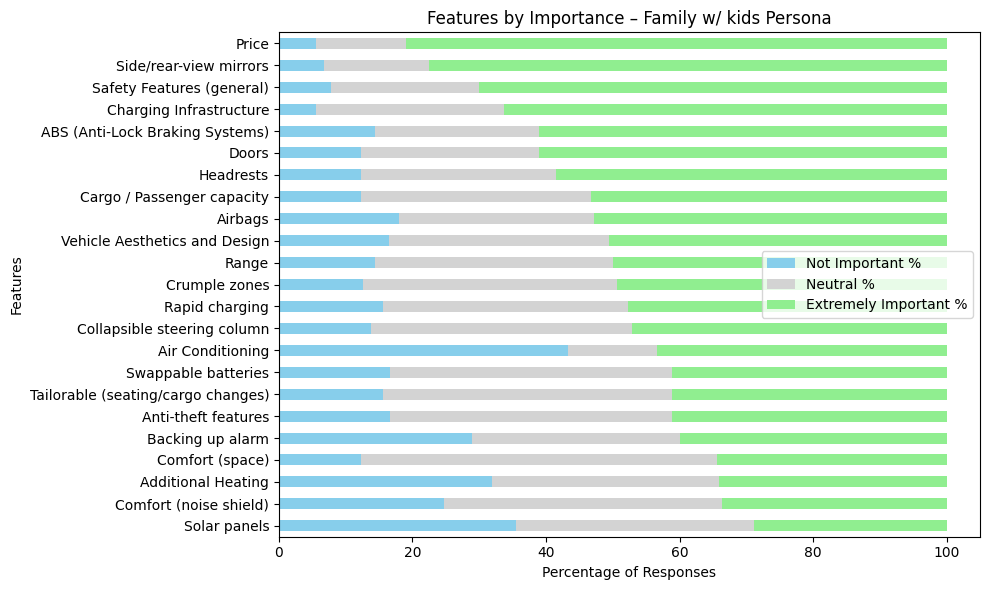

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to categorize the importance rankings into percentages
def calculate_percentages(df, column):
    categories = {
        'Not Important (1-3)': df[column].between(1, 3, inclusive='both').sum(),
        'Neutral (4-6)': df[column].between(4, 6, inclusive='both').sum(),
        'Extremely Important (7-9)': df[column].between(7, 9, inclusive='both').sum()
    }

    # Calculate the percentage for each category
    total_responses = categories['Not Important (1-3)'] + categories['Neutral (4-6)'] + categories['Extremely Important (7-9)']
    percentages = {k: (v / total_responses) * 100 for k, v in categories.items()}
    return percentages

# Function to create a stacked bar chart with percentages displayed
def plot_stacked_bar(df_ranked, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reverse the order to have the most important features at the top
    df_ranked = df_ranked.iloc[::-1]
    
    # Plot the stacked bars
    df_ranked.set_index('Feature').plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightgray', 'lightgreen'])

    # Add title and labels
    plt.title(title)
    plt.xlabel('Percentage of Responses')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

importance_columns_55 = {
    'Additional Heating': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Additional Heating]',
    'Air Conditioning': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Air Conditioning]',
    'Cargo / Passenger capacity': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Cargo / Passenger capacity]',
    'Price': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Price]',
    'Tailorable (seating/cargo changes)': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Tailorable (vehicle modifications made by the user) changes in seating and cargo space]',
    'Doors': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Doors]',
    'Charging Infrastructure': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Charging Infrastructure]',
    'Safety Features (general)': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Safety Features (in general)]',
    'Vehicle Aesthetics and Design': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Vehicle Aesthetics and Design]'
}

importance_columns_56 = {
    'Price': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Price]',
    'Safety Features (general)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Safety features (in general)]',
    'Anti-theft features': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Anti-theft features]',
    'Range': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Range (cover longer distances without charging)]',
    'Rapid charging': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Rapid charging]',
    'Swappable batteries': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Swappable batteries for charging (lighter, ability to self-swap)]',
    'Comfort (space)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Comfort features - Space (legroom and headspace)]',
    'Comfort (noise shield)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Comfort Features – Acoustic (shield from noise)]',
    'Solar panels': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Solar panels]'
}

importance_columns_57 = {
    'ABS (Anti-Lock Braking Systems)': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Anti-Lock Braking Systems (ABS)]',
    'Backing up alarm': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Driving in reverse / Backing up alarm]',
    'Headrests': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Headrests]',
    'Side/rear-view mirrors': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Side/rear-view mirrors]',
    'Airbags': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Airbags]',
    'Crumple zones': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Crumple zones]',
    'Collapsible steering column': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Collapsable steering column]'
}



# Combine all the feature columns into one list for ranking
all_importance_columns = {**importance_columns_55, **importance_columns_56, **importance_columns_57}

def rank_features_by_importance(columns, df):
    """
    Ranks features by their importance based on the given columns in the dataframe.

    Args:
        columns (dict): A dictionary where keys are feature names and values are column names in the dataframe.
        df (DataFrame): The dataframe containing importance ratings.

    Returns:
        DataFrame: A dataframe with features ranked by the percentage of responses in each importance category.
    """
    rankings = []

    for feature, column in columns.items():
        # Ensure the column exists in the dataframe
        if column not in df:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue

        # Calculate percentages for each importance category
        percentages = calculate_percentages(df, column)

        # Append results to the rankings list
        rankings.append({
            'Feature': feature,
            'Not Important %': percentages['Not Important (1-3)'],
            'Neutral %': percentages['Neutral (4-6)'],
            'Extremely Important %': percentages['Extremely Important (7-9)']
        })

    # Convert rankings to a DataFrame
    return pd.DataFrame(rankings)


# Rank the features
ranked_features = rank_features_by_importance(all_importance_columns, df)

# Define cutoffs for grouping the features
must_have_cutoff = 60  # Features with >60% Extremely Important are "Must Have"
neutral_cutoff = 20  # Features with 20-60% Extremely Important are "Neutral"

# Split the ranked features into the three groups based on cutoffs
must_have = ranked_features[ranked_features['Extremely Important %'] > must_have_cutoff]
neutral = ranked_features[(ranked_features['Extremely Important %'] <= must_have_cutoff) & (ranked_features['Extremely Important %'] > neutral_cutoff)]
dont_need = ranked_features[ranked_features['Extremely Important %'] <= neutral_cutoff]

# Sort the ranked features by the percentage of "Extremely Important"
ranked_features = ranked_features.sort_values(by='Extremely Important %', ascending=False)

# Select the top 15 features
top_15_features = ranked_features

# Plot a single stacked bar chart for the top 15 features
plot_stacked_bar(top_15_features, f'Features by Importance – {df.name}')



In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_stacked_bar(df_ranked, title, category_colors, feature_to_category):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Reverse the order to put most important features at the top
    df_ranked = df_ranked.iloc[::-1].copy()

    # Bar segment colors for importance levels
    bar_colors = {
        'Not Important %': 'skyblue',
        'Neutral %': 'lightgray',
        'Extremely Important %': 'lightgreen'
    }

    # Plot the stacked bars
    df_ranked.set_index('Feature')[list(bar_colors.keys())].plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=[bar_colors[k] for k in bar_colors],
        edgecolor='black'
    )

    # Set title and axis labels
    plt.title(title)
    plt.xlabel('Percentage of Responses')
    plt.ylabel('Features')

    # Color y-axis labels (features) by category
    for i, feature in enumerate(df_ranked['Feature']):
        category = feature_to_category.get(feature, None)
        color = category_colors.get(category, "black")
        ax.get_yticklabels()[i].set_color(color)

    # Create legend for feature categories
    category_patches = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
    category_legend = ax.legend(handles=category_patches, title="Feature Category", loc='upper right', bbox_to_anchor=(1.38, 1))
    ax.add_artist(category_legend)

    # Create legend for importance levels
    importance_patches = [mpatches.Patch(color=color, label=label.replace('%', '')) for label, color in bar_colors.items()]
    ax.legend(handles=importance_patches, title="Importance Level", loc='lower right', bbox_to_anchor=(1.38, 0))

    plt.tight_layout()
    plt.show()




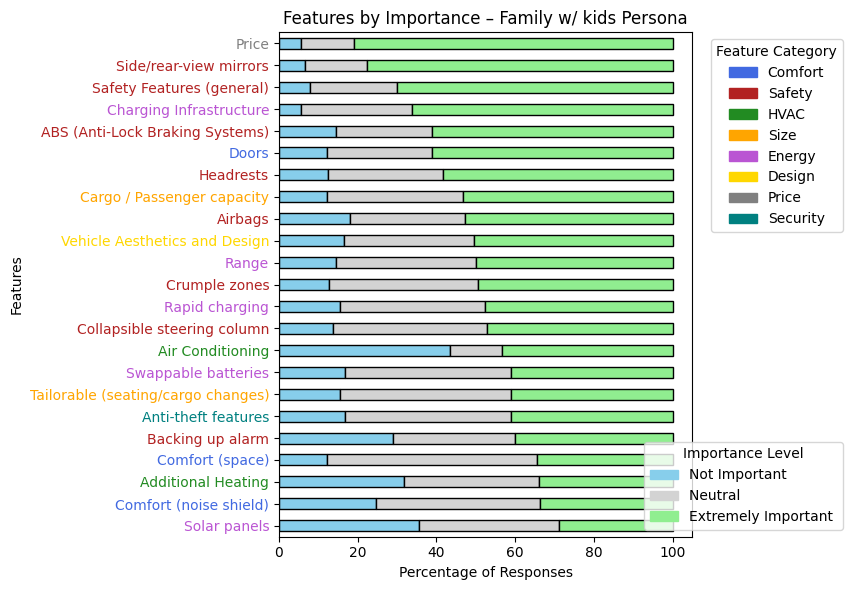

In [21]:
feature_categories = {
    "Comfort": ["Comfort (space)", "Comfort (noise shield)", "Doors", "Air Conditioning", "Additional Heating"],
    "Safety": ["ABS (Anti-Lock Braking Systems)", "Airbags", "Crumple zones", "Collapsible steering column", "Safety Features (general)", "Backing up alarm", "Headrests", "Side/rear-view mirrors"],
    "HVAC": ["Air Conditioning", "Additional Heating"],
    "Size": ["Cargo / Passenger capacity", "Tailorable (seating/cargo changes)"],
    "Energy": ["Rapid charging", "Swappable batteries", "Solar panels", "Range", "Charging Infrastructure"],
    "Design": ["Vehicle Aesthetics and Design"],
    "Price": ["Price"],
    "Security": ["Anti-theft features"]
}

category_colors = {
    "Comfort": "royalblue",
    "Safety": "firebrick",
    "HVAC": "forestgreen",
    "Size": "orange",
    "Energy": "mediumorchid",
    "Design": "gold",
    "Price": "gray",
    "Security": "teal"
}

# Create feature → category map
feature_to_category = {}
for category, features in feature_categories.items():
    for feat in features:
        feature_to_category[feat] = category

# Add color info to DataFrame (optional if you want it elsewhere too)
ranked_features['Color'] = ranked_features['Feature'].map(lambda f: category_colors.get(feature_to_category.get(f, ""), "lightgray"))

plot_stacked_bar(top_15_features, f"Features by Importance – {df.name}", category_colors, feature_to_category)


# City Analysis

In [22]:
import re


# Define the original city column
city_col = '4. City (*If you are completing this survey as a fleet operator, public authority, etc. the primary city of your operations / city you represent)'

# Step 1: Clean city names (lowercase, stripped, drop NA)
cleaned_city_names = (
    df[city_col]
    .dropna()
    .astype(str)
    .str.strip()
    .str.lower()
)

# Step 2: Remove purely numeric or placeholder city names and trim digits from others
cleaned_city_names = cleaned_city_names[~cleaned_city_names.str.fullmatch(r'\d+')]
cleaned_city_names = cleaned_city_names[~cleaned_city_names.isin(['-', '--', 'n/a', 'na', 'none', ''])]
cleaned_city_names = cleaned_city_names.apply(lambda x: re.sub(r'\d+', '', x).strip())

# Step 3: Count initial frequencies
city_counts_df = cleaned_city_names.value_counts().reset_index()
city_counts_df.columns = ['City', 'Count']

# Step 4: Manual replacements
manual_merges = {
    'bern ch': 'bern',
    'quezon  city': 'quezon city',
    'gensan': 'general santos city',
    'les chevreuse': 'saint rémy les chevreuse',
    'praha': 'prague',
    'gent': 'ghent',
    'osteraker, stockholm': 'osteraker',
    'zabbar': 'malta',
    'nashville,tn': 'nashville',
    'south harting, petersfield':'petersfield'
}
city_counts_df['City'] = city_counts_df['City'].replace(manual_merges)

# Step 5: Remove irrelevant entries
irrelevant_cities = ['assistant city planning & development office', 'ev parts distributor (motor & controller)', 
                     'i am a private individual', 'public authority', 'ok']
city_counts_df = city_counts_df[~city_counts_df['City'].isin(irrelevant_cities)]

# Step 6: Merge substrings (e.g. anything containing "normandie" becomes "normandie")
merged_df = pd.DataFrame(columns=['City', 'Count'])
used_indexes = set()

for i, (city, count) in enumerate(city_counts_df[['City', 'Count']].values):
    if i in used_indexes:
        continue
    matches = city_counts_df[city_counts_df['City'].str.contains(rf'\b{re.escape(city)}\b', case=False, na=False)].index.tolist()
    total = city_counts_df.loc[matches, 'Count'].sum()
    merged_df = pd.concat([merged_df, pd.DataFrame([{'City': city, 'Count': total}])], ignore_index=True)
    used_indexes.update(matches)

# Step 7: Merge all known suburbs into 'paris'
paris_variants = [
    'nanterre', 'versailles', 'saint denis', 'saint-ouen', 'boulogne-billancourt',
    'montreuil', 'argenteuil', 'asnières-sur-seine', 'aubervilliers',
    'courbevoie', 'levallois-perret', 'bagnolet', 'clichy', 'issy-les-moulineaux',
    'malakoff', 'saint rémy les chevreuse', 'ile-de-france', 'paris', 'issy les moulineaux'
]
paris_total = merged_df[merged_df['City'].isin(paris_variants)]['Count'].sum()
merged_df = merged_df[~merged_df['City'].isin(paris_variants)]
merged_df = pd.concat([merged_df, pd.DataFrame([{'City': 'paris', 'Count': paris_total}])], ignore_index=True)

# Step 8: Final merge and sort
final_city_df = (
    merged_df
    .groupby('City', as_index=False)
    .agg({'Count': 'sum'})
    .sort_values(by='Count', ascending=False)
    .reset_index(drop=True)
)

# OR, if using Jupyter:
final_city_df.head(20)  # Show top rows




# Assuming final_city_df is your existing DataFrame
# Create a DataFrame from the temperature data
temperature_data = {
    'City': [
        'paris', 'manila', 'quezon city', 'reykjavík', 'brussels', 'prague', 'graz',
        'pasig city', 'amiens', 'thiruvananthapuram', 'qormi', 'versailles', 'breda',
        'eindhoven', 'birkirkara', 'berlin', 'ghent', 'perth', 'antwerp', 'parañaque',
        'general santos city', 'naxxar', 'kathmandu', 'reims', 'issoire', 'pune',
        'lisbon', 'saint peter port', 'amsterdam', 'malmö', 'leuven', 'kerala',
        'guernsey', 'normandie', 'delhi', 'zittau', 'plauen', 'phoenix', 'phnom penh',
        'vientiane', 'vincennes', 'viterbo', 'vorchten', 'witzenhausen', 'malta',
        'zebbug', 'osteraker', 'orsay', 'zurich',
        'nashville', 'south harting', 'petersfield', 'portimao'
    ],
    'Country': [
        'France', 'Philippines', 'Philippines', 'Iceland', 'Belgium', 'Czech Republic', 'Austria',
        'Philippines', 'France', 'India', 'Malta', 'France', 'Netherlands',
        'Netherlands', 'Malta', 'Germany', 'Belgium', 'Australia', 'Belgium', 'Philippines',
        'Philippines', 'Malta', 'Nepal', 'France', 'France', 'India',
        'Portugal', 'Guernsey', 'Netherlands', 'Sweden', 'Belgium', 'India',
        'Guernsey', 'France', 'India', 'Germany', 'Germany', 'USA', 'Cambodia',
        'Laos', 'France', 'Italy', 'Netherlands', 'Germany', 'Malta',
        'Malta', 'Sweden', 'France', 'Switzerland',
        'USA', 'United Kingdom', 'United Kingdom', 'Portugal'
    ],
    'Avg Min Temp (°C)': [
        5.3, 24.0, 24.0, 0.0, 6.0, 1.0, 4.0,
        24.0, 5.0, 23.0, 13.0, 5.3, 3.0,
        3.0, 13.0, 2.0, 8.0, 12.0, 6.0, 24.0,
        24.0, 13.0, 10.0, 5.0, 4.0, 12.0,
        11.0, 8.0, 3.0, 2.0, 6.0, 23.7,
        9.0, 6.0, 13.5, -3.3, -3.3, 7.8, 23.0,
        17.2, 2.2, 3.4, 4.0, -2.2, 10.0,
        10.0, 1.5, 2.0, -3.0,
        4.0, 4.5, 4.5, 11.0
    ],
    'Avg Max Temp (°C)': [
        15.6, 31.0, 31.0, 10.0, 14.0, 13.0, 15.0,
        31.0, 15.0, 31.0, 23.0, 15.6, 15.0,
        15.0, 23.0, 14.0, 16.0, 24.0, 14.0, 31.0,
        32.0, 23.0, 24.0, 15.0, 16.0, 30.0,
        21.0, 15.0, 15.0, 12.0, 14.0, 31.4,
        13.0, 14.0, 33.0, 23.3, 22.8, 40.6, 35.0,
        34.4, 24.4, 30.7, 15.0, 23.3, 30.0,
        30.0, 23.0, 24.0, 24.3,
        28.0, 19.0, 19.0, 26.5
    ]
}





temp_df = pd.DataFrame(temperature_data)

# Ensure consistent casing for merging
final_city_df['City'] = final_city_df['City'].str.lower()
temp_df['City'] = temp_df['City'].str.lower()

# Merge the temperature data with your final_city_df
final_city_df = pd.merge(final_city_df, temp_df, on='City', how='left')

# Sort top 30 after merging temperatures correctly
top_30_city_df = final_city_df.sort_values(by="Count", ascending=False).head(30)


top_30_city_df.style.set_properties(**{
    'color': 'black',  # Make cell text black
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [
            ('background-color', '#ddd'),
            ('text-align', 'center'),
            ('color', 'black')  # This sets the header text to black
        ]
    }
]).format({
    'Avg Min Temp (°C)': '{:.1f}',
    'Avg Max Temp (°C)': '{:.1f}'
}).hide(axis='index')


# Define climate categories based on Avg Max Temp
def classify_climate(row):
    temp = row['Avg Max Temp (°C)']
    if pd.isna(temp):
        return 'Unknown'
    elif temp <= 5:
        return 'Arctic/Frigid'
    elif temp <= 10:
        return 'Cold'
    elif temp <= 15:
        return 'Cool-Temperate'
    elif temp <= 20:
        return 'Mild'
    elif temp <= 25:
        return 'Warm'
    elif temp <= 30:
        return 'Hot'
    else:
        return 'Very Hot'

# Apply to your DataFrame
final_city_df['Climate Zone'] = final_city_df.apply(classify_climate, axis=1)

# Display top 30 with updated zones
final_city_df.sort_values(by='Count', ascending=False).head(30).style.set_properties(**{
    'color': 'black',
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#ddd'), ('text-align', 'center'), ('color', 'black')]}
]).format({
    'Avg Min Temp (°C)': '{:.1f}',
    'Avg Max Temp (°C)': '{:.1f}'
}).hide(axis='index')

# Step 1: Add missing pilot cities
pilot_cities_full = ['bruges', 'stockholm', 'kisumu', 'manila', 'delhi']
existing_cities = final_city_df['City'].str.lower().tolist()

# Create rows for missing pilot cities
missing_cities = [city for city in pilot_cities_full if city not in existing_cities]
new_rows = pd.DataFrame({
    'City': missing_cities,
    'Count': [0] * len(missing_cities),
    'Avg Min Temp (°C)': [None] * len(missing_cities),
    'Avg Max Temp (°C)': [None] * len(missing_cities),
    'Climate Zone': ['Unknown'] * len(missing_cities)
})

# Combine into full dataframe
combined_df = pd.concat([final_city_df, new_rows], ignore_index=True)

# Normalize for sorting
combined_df['City_lower'] = combined_df['City'].str.lower()

# Define the desired custom sort order
custom_order = pilot_cities_full + [c for c in combined_df['City_lower'] if c not in pilot_cities_full]
combined_df['SortKey'] = pd.Categorical(combined_df['City_lower'], categories=custom_order, ordered=True)

# Sort by custom key
combined_df = combined_df.sort_values('SortKey').drop(columns=['City_lower', 'SortKey'])

# Display top cities
combined_df.head(30).style.set_properties(**{
    'color': 'black',
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#ddd'), ('text-align', 'center'), ('color', 'black')]}
]).format({
    'Avg Min Temp (°C)': '{:.1f}',
    'Avg Max Temp (°C)': '{:.1f}'
}).hide(axis='index')

from pandas.io.formats.style import Styler

# Step 1: Update missing city temperatures
combined_df.loc[combined_df['City'].str.lower() == 'stockholm', ['Avg Min Temp (°C)', 'Avg Max Temp (°C)', 'Climate Zone']] = [-3.0, 13.0, 'Cool-Temperate']
combined_df.loc[combined_df['City'].str.lower() == 'kisumu', ['Avg Min Temp (°C)', 'Avg Max Temp (°C)', 'Climate Zone']] = [16.0, 29.0, 'Hot']
combined_df.loc[combined_df['City'].str.lower() == 'bruges', ['Avg Min Temp (°C)', 'Avg Max Temp (°C)', 'Climate Zone']] = [3.0, 21.4, 'Cool-Temperate']


# Step 2: Define pilot cities for styling
pilot_cities_set = {'bruges', 'stockholm', 'kisumu', 'manila', 'delhi'}

# Step 3: Highlight rows in red if pilot city
def highlight_pilot(row):
    if row['City'].lower() in pilot_cities_set:
        return ['color: red'] * len(row)
    else:
        return ['color: black'] * len(row)


# Step 4: Display with styling
combined_df.head(30).style.apply(highlight_pilot, axis=1).set_properties(**{
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#ddd'), ('text-align', 'center'), ('color', 'black')]}
]).format({
    'Avg Min Temp (°C)': '{:.1f}',
    'Avg Max Temp (°C)': '{:.1f}'
}).hide(axis='index')


C:\Users\TomiNordi2m\AppData\Local\Temp\ipykernel_30860\148539097.py:224: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



City,Count,Country,Avg Min Temp (°C),Avg Max Temp (°C),Climate Zone
bruges,0,nan,3.0,21.4,Cool-Temperate
stockholm,0,nan,-3.0,13.0,Cool-Temperate
kisumu,0,nan,16.0,29.0,Hot
manila,1,Philippines,24.0,31.0,Very Hot
delhi,0,nan,nan,nan,Unknown
paris,12,France,5.3,15.6,Mild
brussels,6,Belgium,6.0,14.0,Cool-Temperate
pasig city,3,Philippines,24.0,31.0,Very Hot
qormi,3,Malta,13.0,23.0,Warm
birkirkara,3,Malta,13.0,23.0,Warm


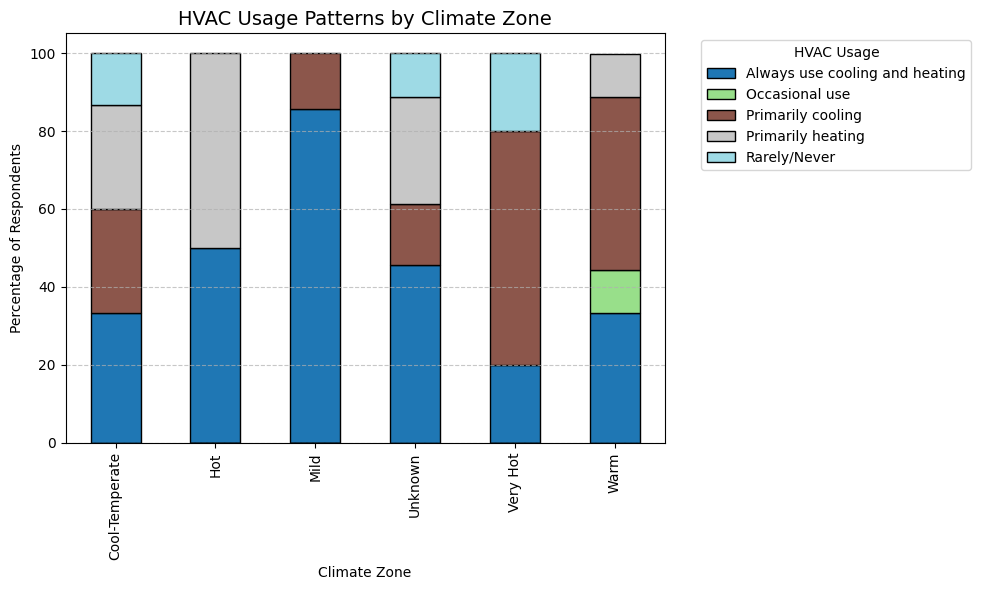

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare HVAC Usage mapping
q65_col = '65. How often do you use the HVAC system (Heating, Ventilation, and Air Conditioning) in your car, and for what purposes? Please select the option that best describes your usage.'

grouped_labels = {
    'I use the HVAC system for both heating and cooling throughout the year.': 'Always use cooling and heating',
    'I use the HVAC system primarily for cooling during hot weather.': 'Primarily cooling',
    'I rarely or never use the HVAC system.': 'Rarely/Never',
    'I use the HVAC system primarily for heating during cold weather.': 'Primarily heating',
    'We live in the desert so AC is required from April through October!': 'Primarily cooling',
    'I use the HVAC system on very cold/hot conditions. Not very often, but necessary on peak situations.': 'Occasional use',
    "For demisting the window's": 'Occasional use',
    'I use the HVAC system for cooling throughout the year (hot weather throughout the year in my country).': 'Primarily cooling',
    'Always on': 'Always use'
}

# Step 2: Map HVAC Usage to new column
df['HVAC Usage'] = df[q65_col].map(grouped_labels)

# Step 3: Prepare cleaned city names for merging
df['City_clean'] = (
    df['4. City (*If you are completing this survey as a fleet operator, public authority, etc. the primary city of your operations / city you represent)']
    .astype(str)
    .str.lower()
    .str.strip()
)

# Step 4: Merge with climate data (combined_df from your previous steps)
hvac_climate_df = df.merge(
    combined_df[['City', 'Avg Min Temp (°C)', 'Avg Max Temp (°C)', 'Climate Zone']],
    how='left',
    left_on='City_clean',
    right_on='City'
)

# Step 5: Calculate percentage HVAC usage per climate zone
climate_usage_counts = (
    hvac_climate_df
    .dropna(subset=['Climate Zone', 'HVAC Usage'])
    .groupby(['Climate Zone', 'HVAC Usage'])
    .size()
    .unstack(fill_value=0)
)

climate_usage_percent = (climate_usage_counts.T / climate_usage_counts.sum(axis=1)).T * 100
climate_usage_percent = climate_usage_percent.round(1)

# Step 6: Plot the stacked bar chart
climate_usage_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

plt.title('HVAC Usage Patterns by Climate Zone', fontsize=14)
plt.ylabel('Percentage of Respondents')
plt.xlabel('Climate Zone')
plt.legend(title='HVAC Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


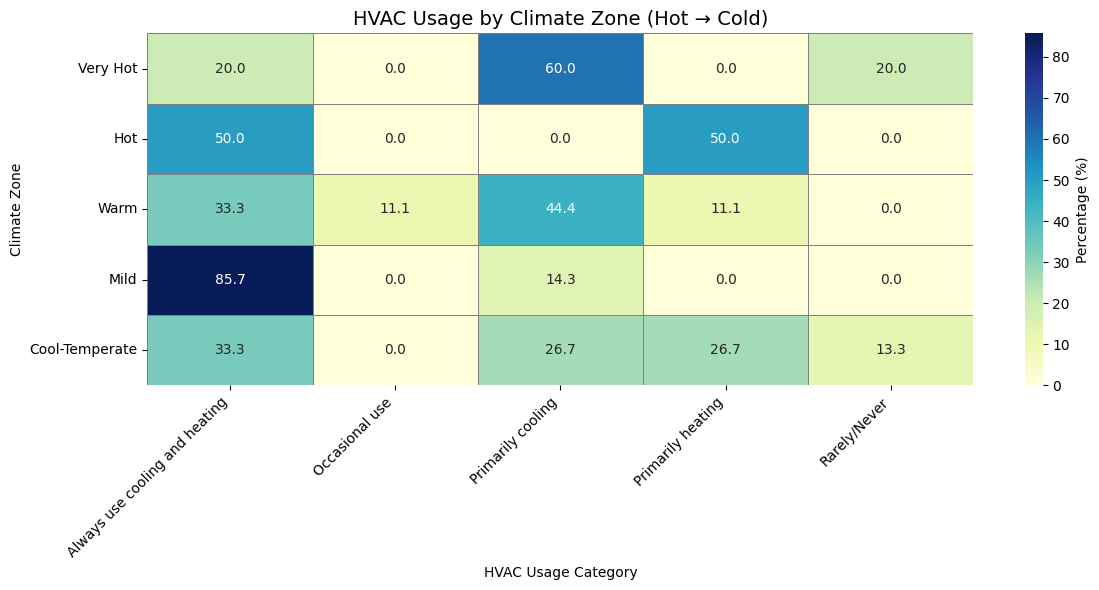

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define reversed order from hot to cold (excluding empty ones)
ordered_climate_zones = [
    'Very Hot', 'Hot', 'Warm', 'Mild', 'Cool-Temperate'
]

# Step 2: Filter and reindex the DataFrame
climate_usage_sorted = (
    climate_usage_percent
    .loc[lambda df: df.index.isin(ordered_climate_zones)]
    .reindex(ordered_climate_zones)
)

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    climate_usage_sorted,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': 'Percentage (%)'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('HVAC Usage by Climate Zone (Hot → Cold)', fontsize=14)
plt.ylabel('Climate Zone')
plt.xlabel('HVAC Usage Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



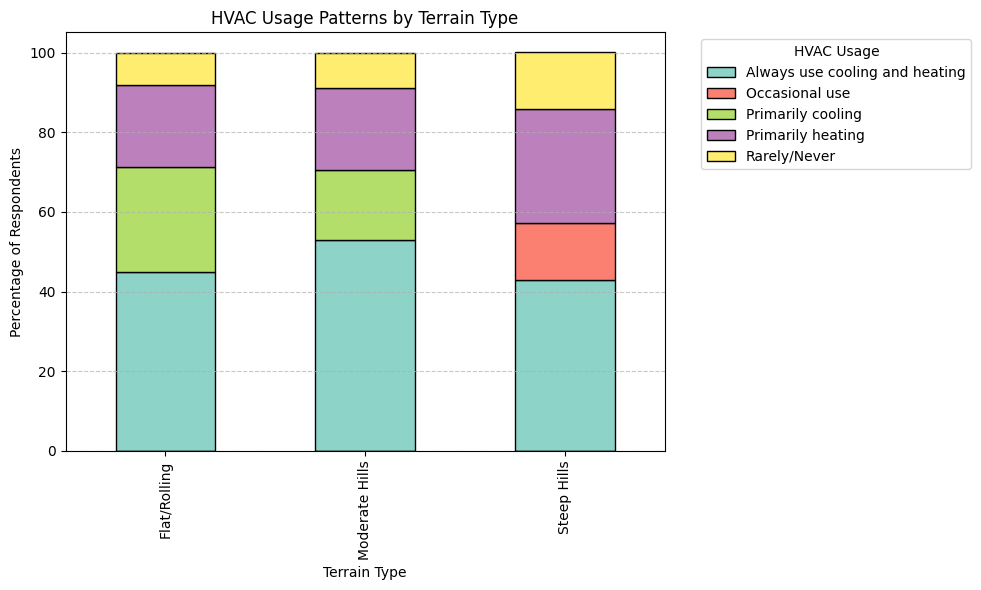

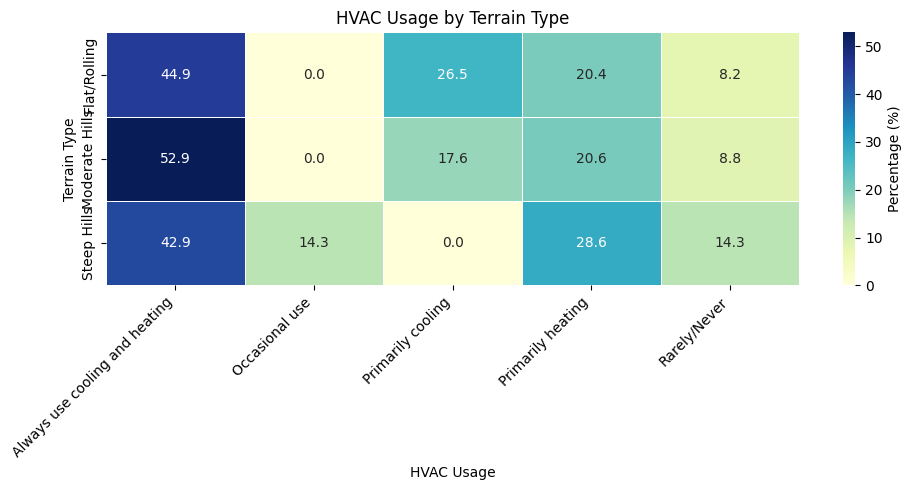

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Map HVAC usage categories
q65_col = '65. How often do you use the HVAC system (Heating, Ventilation, and Air Conditioning) in your car, and for what purposes? Please select the option that best describes your usage.'
hvac_map = {
    'I use the HVAC system for both heating and cooling throughout the year.': 'Always use cooling and heating',
    'I use the HVAC system primarily for cooling during hot weather.': 'Primarily cooling',
    'I rarely or never use the HVAC system.': 'Rarely/Never',
    'I use the HVAC system primarily for heating during cold weather.': 'Primarily heating',
    'We live in the desert so AC is required from April through October!': 'Primarily cooling',
    'I use the HVAC system on very cold/hot conditions. Not very often, but necessary on peak situations.': 'Occasional use',
    "For demisting the window's": 'Occasional use',
    'I use the HVAC system for cooling throughout the year (hot weather throughout the year in my country).': 'Primarily cooling',
    'Always on': 'Always use cooling and heating'
}
df['HVAC Usage'] = df[q65_col].map(hvac_map)

# Step 2: Map terrain profile from Q10
q10_col = [col for col in df.columns if "elevation profile" in col.lower()][0]
terrain_map = {
    'Mostly flat or gently rolling terrain': 'Flat/Rolling',
    'Moderate hills and inclines': 'Moderate Hills',
    'Steep hills and significant elevation changes': 'Steep Hills'
}
df['Terrain Type'] = df[q10_col].map(terrain_map)

# Step 3: Calculate % HVAC usage by terrain type
hvac_terrain_counts = (
    df.dropna(subset=['HVAC Usage', 'Terrain Type'])
    .groupby(['Terrain Type', 'HVAC Usage'])
    .size()
    .unstack(fill_value=0)
)

hvac_terrain_percent = (hvac_terrain_counts.T / hvac_terrain_counts.sum(axis=1)).T * 100
hvac_terrain_percent = hvac_terrain_percent.round(1)

# Step 4: Plot stacked bar chart
hvac_terrain_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set3',
    edgecolor='black'
)

plt.title('HVAC Usage Patterns by Terrain Type')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Terrain Type')
plt.legend(title='HVAC Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Optional heatmap for clarity
plt.figure(figsize=(10, 5))
sns.heatmap(
    hvac_terrain_percent,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title('HVAC Usage by Terrain Type')
plt.ylabel('Terrain Type')
plt.xlabel('HVAC Usage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
